In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
movies = pd.read_csv('movie_dataset.csv')
movies.drop(["production_companies_number" , "production_countries_number" ,"spoken_languages_number","release_date" ] , axis=1)

,id,budget,genres,year,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,2,0,Drama|Crime,1988.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,0,69.0,suomi,Released,NaN,Ariel,7.1,40
1,3,0,Drama|Comedy,1986.0,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,0,76.0,English,Released,NaN,Shadows in Paradise,7.0,32
2,5,4000000,Crime|Comedy,1995.0,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,4300000,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485
3,6,0,Action|Thriller|Crime,1993.0,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,12136938,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69
4,8,42000,Documentary,2006.0,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,0,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,469215,0,Documentary|History|TV Movie,NaN,en,The Day Hitler Died,The story of Hitler’s final hours told by peop...,0.0045,History Channel,United States of America,0,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1
9825,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,0,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1
9826,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,0,11.0,English,Released,NaN,#idiot,0.0,0
9827,469218,0,Drama|Comedy,NaN,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,0,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0


In [3]:
movies.head()

,id,budget,genres,year,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,1988.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,1986.0,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,1995.0,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,1993.0,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,2006.0,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [4]:
movies.isna().sum()

id                                0
budget                            0
genres                         4403
year                           9307
original_language                 0
original_title                    0
overview                       2016
popularity                        0
production_companies              0
production_countries              0
release_date                   2098
revenue                           0
runtime                        1879
spoken_languages                154
status                            0
tagline                        8584
title                             0
vote_average                      0
vote_count                        0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
dtype: int64

In [5]:
movies.dropna(inplace= True)

In [6]:
movies.isna().sum()


id                             0
budget                         0
genres                         0
year                           0
original_language              0
original_title                 0
overview                       0
popularity                     0
production_companies           0
production_countries           0
release_date                   0
revenue                        0
runtime                        0
spoken_languages               0
status                         0
tagline                        0
title                          0
vote_average                   0
vote_count                     0
production_companies_number    0
production_countries_number    0
spoken_languages_number        0
dtype: int64

In [7]:
movies.duplicated().sum()

0

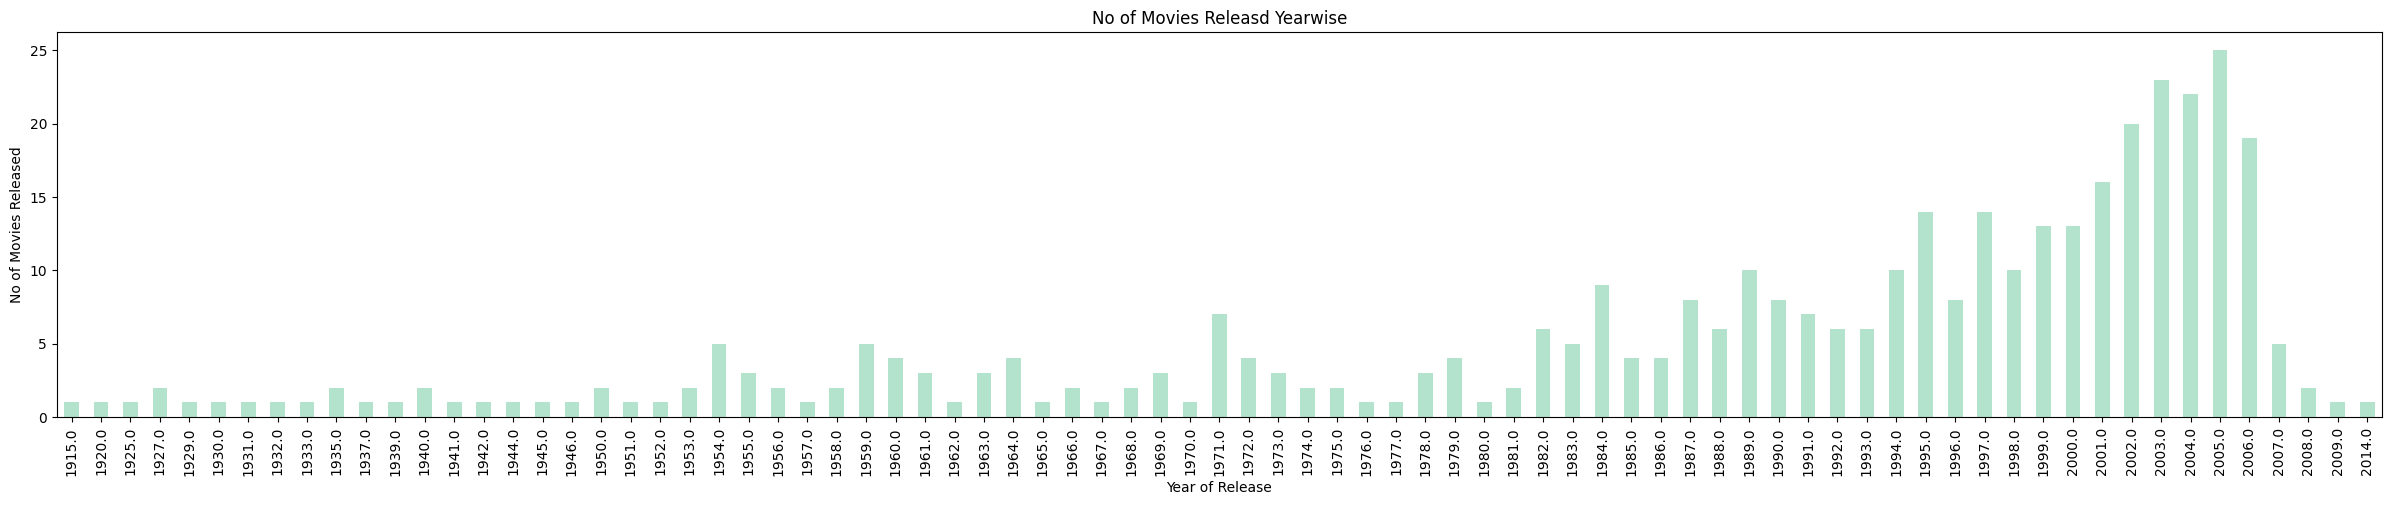

In [8]:
movies.groupby('year').count()['original_title'].plot(kind='bar',figsize=(30,5),cmap='Pastel2')
plt.xlabel('Year of Release')
plt.ylabel('No of Movies Released')
plt.title('No of Movies Releasd Yearwise')
plt.show()

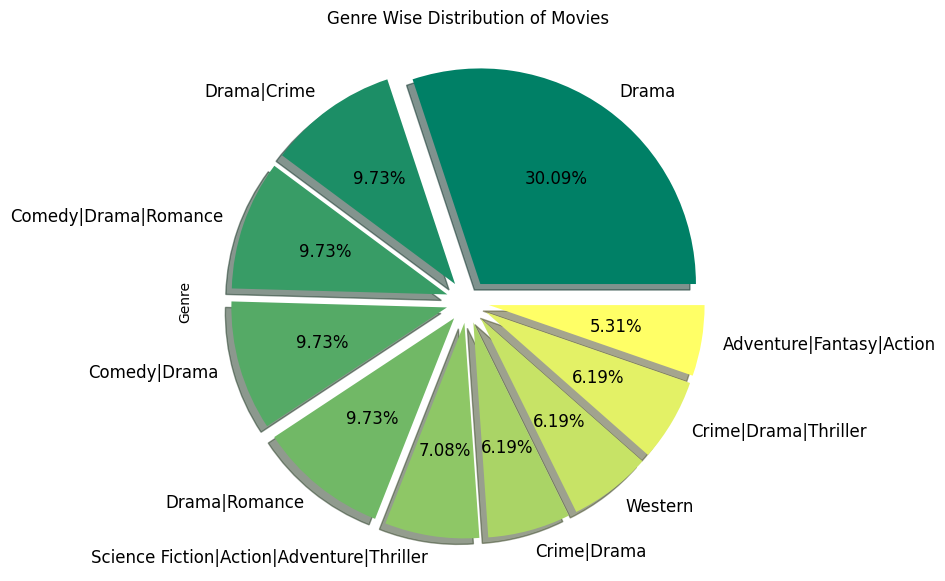

In [9]:
movies['genres'].value_counts()[:10].plot(kind='pie',explode=np.full(10,0.1),fontsize=12,autopct='%3.2f%%',
                                       shadow=True,cmap='summer',figsize=(10,7))
plt.title('Genre Wise Distribution of Movies')
plt.ylabel('Genre')
plt.show()

In [10]:
def calculate_metascore(average_vote):
    return (average_vote / 10) * 100
movies['metascore'] = movies['vote_average'].apply(calculate_metascore)

Text(0.5, 1.0, "Movies Appreciated by Critic's")

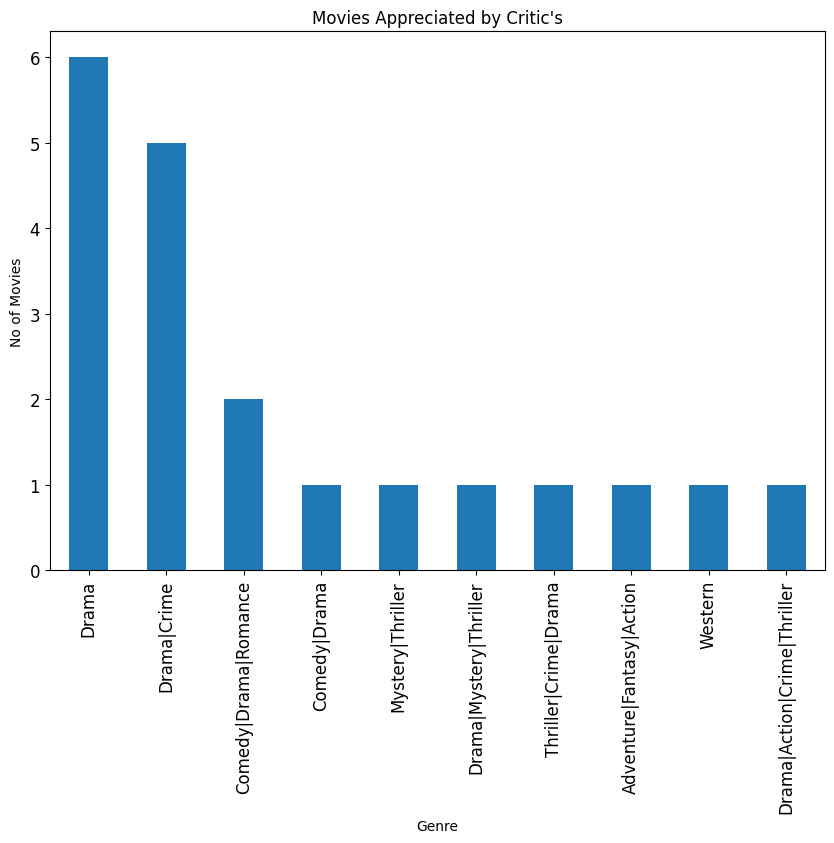

In [11]:
desirable = movies[movies['metascore'] > 80].sort_values(by=['metascore'],ascending=False)
desirable['genres'].value_counts()[:10].plot(kind='bar',figsize=(10,7),fontsize=12)
plt.xlabel('Genre')
plt.ylabel('No of Movies')
plt.title("Movies Appreciated by Critic's")

In [12]:
movie_title  = "Four Rooms"
movie_title = movies[movies['original_title'].str.contains(movie_title, na= False)]

sorted_movie_title = movie_title.sort_values(by='metascore', ascending= False)

print( sorted_movie_title[['original_title', 'year', 'metascore']])

  original_title    year  metascore
2     Four Rooms  1995.0       65.0


# COSINE SIMILARITY


In [13]:
cv = CountVectorizer(max_features= 5000, stop_words='english')

In [14]:
ps = PorterStemmer()

In [15]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [16]:
movies['tagline'] = movies['tagline'].apply(stem)

In [17]:
vectors = cv.fit_transform(movies['tagline']).toarray()

In [18]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
cv.get_feature_names_out()

array(['000', '10', '100', '11', '13', '13th', '1945', '1969', '1972',
       '1993', '25', '30', '40', '60', '65', '79', 'absolutely',
       'academi', 'act', 'action', 'actress', 'ado', 'adopt', 'adventur',
       'affairs', 'afraid', 'age', 'ago', 'ahead', 'ain', 'al', 'alfr',
       'alley', 'alreadi', 'altamont', 'america', 'american', 'anatomi',
       'andi', 'angel', 'ani', 'anim', 'anoth', 'answers', 'anyth',
       'apart', 'april', 'aren', 'arms', 'arrang', 'artist', 'asked',
       'assembled', 'athlet', 'attention', 'audrey', 'aunt', 'autumn',
       'avenge', 'await', 'award', 'away', 'bad', 'ban', 'bandit', 'bank',
       'bardot', 'base', 'baseball', 'bat', 'battl', 'becam', 'becaus',
       'becom', 'bed', 'beethoven', 'befor', 'began', 'begin',
       'beginning', 'begins', 'begu', 'begun', 'believ', 'bellhop',
       'belong', 'bend', 'bent', 'berlin', 'best', 'betrayal', 'better',
       'big', 'billi', 'black', 'bleeds', 'blood', 'blow', 'blown',
       'bold', 'b

In [20]:
similarity = cosine_similarity(vectors)

In [21]:
sorted(list(enumerate(similarity[1])), reverse=True, key=lambda x: x[1])[1:6]


[(336, 0.6396021490668312),
 (8, 0.5222329678670936),
 (125, 0.40451991747794525),
 (96, 0.3418817293789138),
 (151, 0.3418817293789138)]

In [22]:
def recommend(movie):
    movie_index = movies[movies['original_title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    for i in movies_list:
        print(movies.iloc[i[0]].original_title ," ",movies.iloc[i[0]].metascore  )

In [23]:
recommend("Forrest Gump")

Judgment Night   65.0
Back to the Future Part II   74.0
Jaws   75.0
The Lord of the Rings: The Return of the King   81.0
The Interpreter   62.0


# Singular Value Decomposition (SVD) 


In [24]:
movies_rating = pd.read_csv("movies_ratings.csv")
ratings = pd.read_csv("ratings.csv")

In [25]:
movies_rating.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [27]:
rating_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
rating_matrix = rating_matrix.fillna(0)
R = rating_matrix.values

In [28]:
k = 50
U, sigma, Vt = svds(R, k=k)
sigma_diag = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt)
predicted_rating_matrix = pd.DataFrame(predicted_ratings, columns=rating_matrix.columns, index=rating_matrix.index)


In [29]:
def get_recommendations(user_id, top_n=10):
    user_ratings = predicted_rating_matrix.loc[user_id]
    top_movies = user_ratings.sort_values(ascending=False).index[:top_n]
    return top_movies
recommended_movies = get_recommendations(5)
print("Recommended movies for user 1:", recommended_movies)

Recommended movies for user 1: Index([1, 3114, 4306, 364, 588, 2355, 595, 4886, 296, 6377], dtype='int64', name='movieId')


In [30]:
for i in recommended_movies:
    mov_name =  movies_rating.query('movieId == {}'.format(i) )
    display(mov_name)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


,movieId,title,genres
2496,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy


,movieId,title,genres
3379,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...


,movieId,title,genres
323,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX


,movieId,title,genres
521,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical


,movieId,title,genres
1866,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy


,movieId,title,genres
527,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX


,movieId,title,genres
3811,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy


,movieId,title,genres
260,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


,movieId,title,genres
4704,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy


# KNN on basis of geners

In [31]:
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_)
movies_df = pd.concat([pd.DataFrame(movies['original_title'], columns=['original_title']), genres_encoded], axis=1)

In [32]:
k = 11
knn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')
knn.fit(genres_encoded)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=11)

In [33]:
def recommend(movie_index):
    distances, indices = knn.kneighbors([genres_encoded.iloc[movie_index]])
    print(f"Recommendations for {movies_df.iloc[movie_index]['original_title']}:")
    for i in range(1, len(indices[0])):
        print(f"{movies_df.iloc[indices[0][i]]['original_title']} (Similarity: {1 - distances[0][i]})")


In [34]:
recommend(10)

Recommendations for The Fifth Element:
E.T. the Extra-Terrestrial (Similarity: 0.9271050693011066)
Star Trek: First Contact (Similarity: 0.9258200997725516)
Star Trek II: The Wrath of Khan (Similarity: 0.9258200997725516)
Jurassic Park III (Similarity: 0.9258200997725516)
The Day After Tomorrow (Similarity: 0.9258200997725516)
The Matrix Reloaded (Similarity: 0.9258200997725516)
Star Trek VI: The Undiscovered Country (Similarity: 0.9258200997725516)
Star Trek: Generations (Similarity: 0.9258200997725516)
War of the Worlds (Similarity: 0.9258200997725516)
Star Trek III: The Search for Spock (Similarity: 0.9258200997725516)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
